**Importing** **important libraries**

In [ ]:
import Augmentor
import numpy as np
import cv2
import seaborn as sn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras import layers
import tensorflow as tf
from sklearn.metrics import classification_report

In [ ]:
path_to_data = '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset'

Making an image directory for all the classes

In [ ]:
import os
img_dirs = []
for i in os.scandir(path_to_data):
      if i.is_dir():
        img_dirs.append(i.path)

In [ ]:
img_dirs

['/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Roger_Federrer',
 '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james',
 '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Tiger_woods',
 '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Sachin_Tendulkar',
 '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Messi']

Augmentor is a Python package designed to aid the augmentation and artificial generation of image data for machine learning tasks.

With the help of Augmentor package I created 1000 augmented images per class.

In [ ]:
for img_dir in img_dirs:
        p = Augmentor.Pipeline(img_dir,output_directory = img_dir)
        p.zoom(probability=0.3, min_factor = 0.8,max_factor = 1.5)
        p.flip_top_bottom(probability = 0.4)
        p.random_brightness(probability = 0.3,min_factor = 0.3, max_factor = 1.2)
        p.random_distortion(probability = 0.7,grid_width = 4,grid_height = 4, magnitude = 8)
        p.sample(1000)

Initialised with 148 image(s) found.
Output directory set to /content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Roger_Federrer.

Processing <PIL.Image.Image image mode=RGB size=1200x667 at 0x7F3C831C6850>: 100%|██████████| 1000/1000 [02:17<00:00,  7.25 Samples/s]


Initialised with 127 image(s) found.
Output directory set to /content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james.

Processing <PIL.Image.Image image mode=RGB size=1200x836 at 0x7F3C7F91A610>: 100%|██████████| 1000/1000 [03:40<00:00,  4.53 Samples/s]


Initialised with 100 image(s) found.
Output directory set to /content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Tiger_woods.

Processing <PIL.Image.Image image mode=RGB size=775x465 at 0x7F3C7F8E1450>: 100%|██████████| 1000/1000 [02:23<00:00,  6.98 Samples/s]


Initialised with 92 image(s) found.
Output directory set to /content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Sachin_Tendulkar.

Processing <PIL.Image.Image image mode=RGB size=273x307 at 0x7F3C7F7A8CD0>: 100%|██████████| 1000/1000 [01:40<00:00,  9.90 Samples/s]


Initialised with 212 image(s) found.
Output directory set to /content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Messi.

Processing <PIL.Image.Image image mode=RGB size=1200x667 at 0x7F3C7F8F4AD0>: 100%|██████████| 1000/1000 [02:22<00:00,  7.00 Samples/s]


Creating the dictionary to store player name and respective player images path as key-value pairs.

In [ ]:
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Lebron_james': ['/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james/Lebron_james_original_LeBron James on NBA-China row_ Morey....jpg_c82b04fd-29fa-4fc1-b24c-4ddc836644bf.jpg',
  '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james/Lebron_james_original_134_469 Lebron James Photos and Premium... (4).jpg_72e42596-5c60-424e-880c-f19b863e6489.jpg',
  '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james/Lebron_james_original_LeBron James Explains Why He Took Down....jpg_82453215-aff9-4bfc-9ec3-1cf035b95f64.jpg',
  '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james/Lebron_james_original_Group backed by LeBron James launches a... (1).jpg_8e09e470-825e-4c15-838f-1e015429c870.jpg',
  '/content/drive/MyDrive/Sports Personality Classifier/model/Dataset/Lebron_james/Lebron_james_original_Lakers LeBron James Most Intense....jpg_9c0d297e-2c26-4fb1-8c18-e0166a1133e6.jpg',
  '/content/

To label the dataset I have created another dictionary to store player names and their respective indexes in a key value pair.

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Lebron_james': 1,
 'Messi': 4,
 'Roger_Federrer': 0,
 'Sachin_Tendulkar': 3,
 'Tiger_woods': 2}

Reading all the images with the help of open cv and resizing them.
The scaled images will be stored in independent variable X and the index value of that particular player will be stored in target variable Y

In [ ]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scaled_img = cv2.resize(img, (128, 128))
            X.append(scaled_img)
            y.append(class_dict[celebrity_name])  

Converting the above list into numpy array to perform some operations.

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X.shape

(5679, 128, 128, 3)

Splitting the data into X_train X_test y_train y_test with the help of train test split.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size = 0.2)

Rescaling the pixel values between 0 and 1

In [ ]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255


Model Creation

In [ ]:
num_classes = 5

model = keras.Sequential([
  layers.Conv2D(32, 3, padding='same', activation='relu',input_shape = (128,128,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  
  layers.Dense(num_classes,activation = 'softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=20) 

Epoch 1/20
142/142 [==============================] - 64s 34ms/step - loss: 1.2745 - accuracy: 0.4563
Epoch 2/20
142/142 [==============================] - 5s 34ms/step - loss: 0.7850 - accuracy: 0.6980
Epoch 3/20
142/142 [==============================] - 5s 34ms/step - loss: 0.4829 - accuracy: 0.8270
Epoch 4/20
142/142 [==============================] - 5s 34ms/step - loss: 0.3211 - accuracy: 0.8838
Epoch 5/20
142/142 [==============================] - 5s 34ms/step - loss: 0.1848 - accuracy: 0.9375
Epoch 6/20
142/142 [==============================] - 5s 34ms/step - loss: 0.1515 - accuracy: 0.9507
Epoch 7/20
142/142 [==============================] - 5s 34ms/step - loss: 0.1120 - accuracy: 0.9628
Epoch 8/20
142/142 [==============================] - 5s 34ms/step - loss: 0.1030 - accuracy: 0.9679
Epoch 9/20
142/142 [==============================] - 5s 34ms/step - loss: 0.0895 - accuracy: 0.9729
Epoch 10/20
142/142 [==============================] - 5s 34ms/step - loss: 0.0439 - accur

Checking accuracy score on testing data

In [69]:
model.evaluate(X_test_scaled,y_test)

36/36 [==============================] - 1s 17ms/step - loss: 0.2230 - accuracy: 0.9454


[0.22301232814788818, 0.9454225301742554]

In [ ]:
y_pred = model.predict(X_test_scaled)

Predicting some test images

In [70]:
def sample(index):
  plt.matshow(X_test[index])

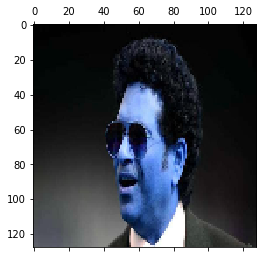

In [71]:
#X_test
sample(200)

In [72]:
def sample1(index):
  print(y_test[index])

In [73]:
# y_test
sample1(200)

3


In [74]:
# Predicted Values
np.argmax(y_pred[200])

3

Created a function which will take image path and predict the personality

In [ ]:
def get_image(path):
  image = cv2.imread(path)
  image = cv2.resize(image,(128,128))
  np_image = np.array(image).astype('float32')/255
  np_image = np.expand_dims(np_image, axis=0)
  result = np.argmax(model.predict(np_image))
  plt.matshow(image)
  return result

2

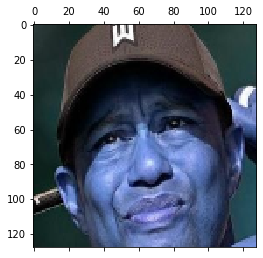

In [ ]:
get_image('/content/t-1.jpeg')

{'Lebron_james': 1,
 'Messi': 4,
 'Roger_Federrer': 0,
 'Sachin_Tendulkar': 3,
 'Tiger_woods': 2}

Classification Report

In [75]:
print(classification_report(y_test, np.array([np.argmax(i) for i in y_pred])))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       227
           1       0.98      0.97      0.98       223
           2       0.96      0.98      0.97       226
           3       0.95      0.88      0.92       226
           4       0.93      0.96      0.94       234

    accuracy                           0.95      1136
   macro avg       0.95      0.95      0.95      1136
weighted avg       0.95      0.95      0.95      1136



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, np.array([np.argmax(i) for i in y_pred]))
cm

array([[211,   2,   1,   7,   6],
       [  0, 217,   1,   1,   4],
       [  4,   0, 222,   0,   0],
       [ 15,   0,   4, 200,   7],
       [  3,   2,   3,   2, 224]])

Text(69.0, 0.5, 'Truth')

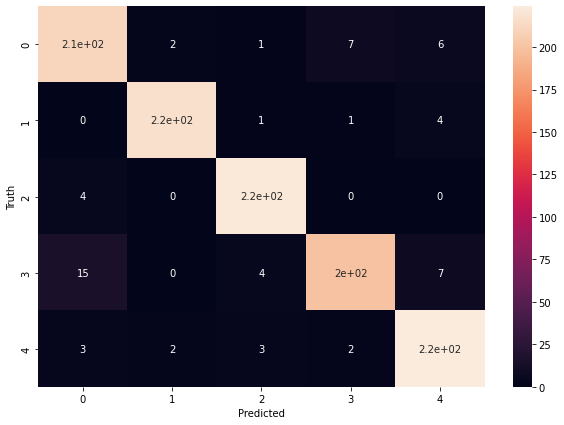

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
class_dict

{'Lebron_james': 1,
 'Messi': 4,
 'Roger_Federrer': 0,
 'Sachin_Tendulkar': 3,
 'Tiger_woods': 2}

In [77]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(model, 'Classifier_model.pkl') 

INFO:tensorflow:Assets written to: ram://8cd4777c-0901-4f74-b95c-c577b2ec9bee/assets


['Classifier_model.pkl']

In [78]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))